In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [27]:
df= pd.DataFrame({'area':["2600","3000","3200","3600","4000"],'price':["550000","565000","610000","680000","725000"]})

In [28]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


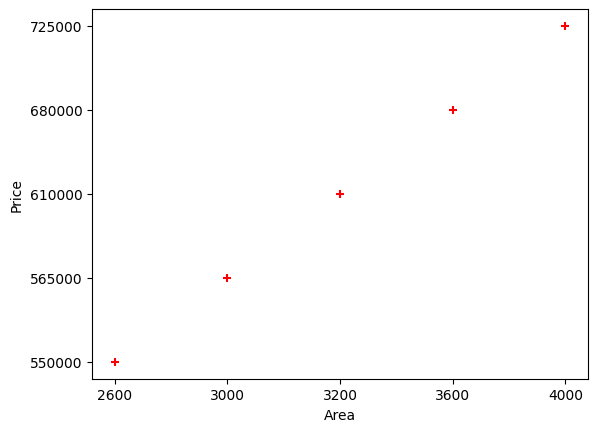

In [29]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [30]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [31]:
x=5000
reg.predict([[x]])

C:\Users\Mujtaba Jafri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [32]:
m=reg.coef_
print(m)

[135.78767123]


In [33]:
b=reg.intercept_
print(b)

180616.43835616432


In [34]:
y=m*x+b
print(y)

[859554.79452055]


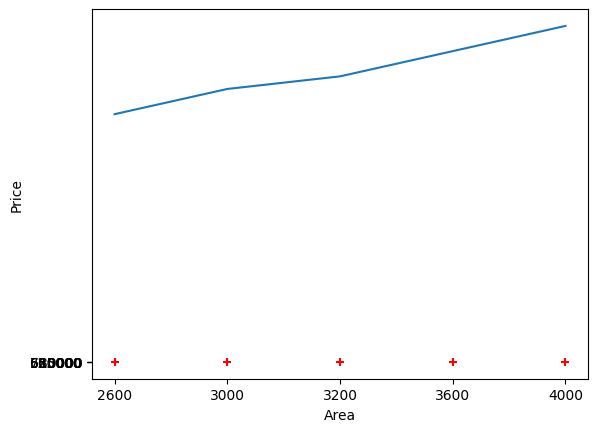

In [11]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.area,df.price,color='red',marker='+')
plt.plot(df.area,reg.predict(df[['area']]))

In [12]:
d=pd.DataFrame({'area':['1000','1500','2000','2500','3750','6400','8600']})
d.head(3)
# convert this to a csv
d.to_csv('area.csv',index=False)

In [13]:
p=reg.predict(d)

In [14]:
d['prices']=p

In [15]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2000,4.521918e+05
3,2500,5.200856e+05
4,3750,6.898202e+05
5,6400,1.049658e+06
6,8600,1.348390e+06


In [16]:
d.prices=d.prices.apply(lambda x: "%.2f" %x)
d.prices=d.prices.astype(float)/1000

In [17]:
d.rename(columns={'prices':'price (in k of $)'},inplace=True)
d

,area,price (in k of $)
0,1000,316.40411
1,1500,384.29795
2,2000,452.19178
3,2500,520.08562
4,3750,689.82021
5,6400,1049.65753
6,8600,1348.39041


In [18]:
d.to_csv('prediciton.csv',index=False)

In [35]:
import pickle

In [36]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [37]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [38]:
mp.predict(5000)

C:\Users\Mujtaba Jafri\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=5000.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.